Dawit Reda
ID#10189420
Module 6 Assignment Project 
MCIS 535 - Data Access and Transformation
Submitted to Dr. Daniel Wu

# Economic Growth in East Africa

### 1. Introduction 
According to the African development bank group, the economic growth in East Africa is growing faster than other regions of Africa `[1]`. The purpose of this project is to overview, compare and Analysis Ethiopian Economic growth with East African's countries:Burundi, Djibouti, Kenya, Rwanda, South Sudan, Tanzania, Uganda, and Somalia Economic growth in terms of population, GDP and inflation. In this project, I am going to use python libraries to import the data from world bank dataset(http://api.worldbank.org).

Objective of the project:
   + To use pandas and other python libraries to import, clean and analysis World bank datasest for East Africa
   + Compare population growth rate of Ethiopia with other East Africa Countries
   + Estimate and compare rate of growth of Ethiopia with East Africa Countries
   + Analysis Ethiopian economic growth in terms of GDP and inflation 
   + Using wbdata library import the datasets from world bank and load it to MYSQL   

## 1.1 Import important libraries

In [114]:
#import important libraries
from urllib.request import urlopen   
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import requests
import time
import datetime
import urllib.request as request
import json
import wbdata
import MySQLdb
import mysql.connector
from mysql.connector import errorcode
import pymysql
from sqlalchemy import create_engine

## 1.2 Import Data

+ The wbdata is a simple python interface to fetch and request data from the World Bank’s various databases, either as a dictionary containing full metadata or as a pandas DataFrame.
+ Since, we need to install the library wbdata using pip: pip install wbdata. 
+ The documentations for world bank is in https://wbdata.readthedocs.io/en/latest/
+ The get_dataframe helps us to get the data from the world bank and keep inside of pandas dataframe. The parameters we need to pass in get_dataframe are 1. indicators which are for population, GDP and inflation, 2. country_ID, 3. data range.

In [115]:
#To request all indicators 'http://api.worldbank.org/v2/indicator'
url='http://api.worldbank.org/v2/indicators/NY.GDP.MKTP.CD?format=json'
with request.urlopen(url) as response:
    source = response.read()
    data = json.loads(source)
    # converting json dataset from dictionary to dataframe
    
print(data)

[{'page': 1, 'pages': 1, 'per_page': '50', 'total': 1}, [{'id': 'NY.GDP.MKTP.CD', 'name': 'GDP (current US$)', 'unit': '', 'source': {'id': '2', 'value': 'World Development Indicators'}, 'sourceNote': "GDP at purchaser's prices is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in current U.S. dollars. Dollar figures for GDP are converted from domestic currencies using single year official exchange rates. For a few countries where the official exchange rate does not reflect the rate effectively applied to actual foreign exchange transactions, an alternative conversion factor is used.", 'sourceOrganization': 'World Bank national accounts data, and OECD National Accounts data files.', 'topics': [{'id': '3', 'value': 'Economy & Growth'}

### 1.3 Countries ID

In [286]:
#let's get the lists of the East Africa countries ID for Ethiopia, Burundi, Djibouti, 
#Kenya, Rwanda, South Sudan, Tanzania, Uganda,and Somalia 
wbdata.search_countries("Ethiopia")
wbdata.search_countries("Burundi")
wbdata.search_countries("Djibouti")
wbdata.search_countries("Kenya")
wbdata.search_countries("Rwanda")
wbdata.search_countries("South Sudan")
wbdata.search_countries("Tanzania")
wbdata.search_countries("Uganda")
wbdata.search_countries("Somalia")

ETH	Ethiopia
BDI	Burundi
DJI	Djibouti
KEN	Kenya
RWA	Rwanda
SSD	South Sudan
TZA	Tanzania
UGA	Uganda
SOM	Somalia


In [287]:
#import data for a East Africa countrie(country as a parameter)
def import_data(input_country):
    #Let's create a dictionary to store the indicators name and value for comparison purpose
    #the index SP.POP.TOTL is for Population, NY.GDP.MKTP.CD is for GDP, FP.CPI.TOTL.ZG is for Inflation
    indicators = {"SP.POP.TOTL":"Population","NY.GDP.MKTP.CD":"GDP","FP.CPI.TOTL.ZG":"Inflation"}
    
    #let's fetch the data starting from 1959 for 60 years
    dates = (datetime.datetime(1994, 1, 1), datetime.datetime(2019, 1, 1))
    
    #using the wbdata API we can pull the datasets by passing:-indicators, countray name and time intrevales
    df  = wbdata.get_dataframe(indicators, country=input_country, data_date=dates)
    #rmeove the first index
    df.reset_index(level=0, inplace=True)
    #rename the first column as a year
    df_final= df.rename(columns={"date": "Year"})
    
    return df_final    

In [176]:
#let's see a sample data by passing a country name - Ethiopia-ETH in the import_data function
df_Ethio =import_data('ETH')
df_Ethio.head()

,Year,Population,GDP,Inflation
0,2018,109224559.0,8.435546e+10,NaN
1,2017,106400024.0,8.171633e+10,9.848250
2,2016,103603501.0,7.427128e+10,7.263732
3,2015,100835458.0,6.446455e+10,10.110748
4,2014,98094253.0,5.561223e+10,7.402193


## 2. Population Growth In East Africa

+ Let's pull the population of East Africa Countries using the import_data function

In [261]:
#the East_Africa_population function below
def East_Africa_population():
    
    #let's call the function import_data and pass the parametrs
    Ethiopia_pop=import_data('ETH')['Population']
    Burundi_pop=import_data('BDI')['Population']
    Djibouti_pop=import_data('DJI')['Population']
    Kenya_pop=import_data('KEN')['Population']
    Rwanda_pop=import_data('RWA')['Population']
    South_Sudan_pop=import_data('SSD')['Population']
    Tanzania_pop=import_data('TZA')['Population']
    Uganda_pop=import_data('UGA')['Population']
    Somalia_pop=import_data('SOM')['Population']
    
    #create a column name
    col = ['Year','Ethiopia','Burundi', 'Djibouti', 'Kenya', 
           'Rwanda', 'South Sudan', 'Tanzania', 'Uganda', 'Somalia']

    #let's create a new dataframe to store all the population populated above
    df_population = pd.concat([df_Ethio['Year'],Ethiopia_pop, Burundi_pop,Djibouti_pop,
                           Kenya_pop,Rwanda_pop,South_Sudan_pop,
  
                           Tanzania_pop,Uganda_pop,Somalia_pop],axis=1, sort=False)
    #rename the column
    df_population.columns=col
    
    df_population.sort_values(by=['Year'], inplace=True)
    
    return df_population
    
    
East_Africa_population().head()

,Year,Ethiopia,Burundi,Djibouti,Kenya,Rwanda,South Sudan,Tanzania,Uganda,Somalia
24,1994,55180998.0,5898967.0,622366.0,26950513.0,5936261.0,5111365.0,28792639.0,19793541.0,7372598.0
23,1995,57047908.0,5987043.0,630388.0,27768296.0,5836495.0,5118083.0,29649135.0,20413152.0,7491637.0
22,1996,58883530.0,6060111.0,643654.0,28589451.0,6013107.0,5221926.0,30444526.0,21032821.0,7682686.0
21,1997,60697443.0,6122130.0,660863.0,29415659.0,6419901.0,5411655.0,31192857.0,21655398.0,7936127.0
20,1998,62507724.0,6185562.0,680463.0,30250488.0,6962802.0,5661942.0,31924196.0,22290780.0,8235064.0


In [244]:
East_Africa_population().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 24 to 0
Data columns (total 10 columns):
Year           25 non-null object
Ethiopia       25 non-null float64
Burundi        25 non-null float64
Djibouti       25 non-null float64
Kenya          25 non-null float64
Rwanda         25 non-null float64
South Sudan    25 non-null float64
Tanzania       25 non-null float64
Uganda         25 non-null float64
Somalia        25 non-null float64
dtypes: float64(9), object(1)
memory usage: 2.1+ KB


In [245]:
East_Africa_population().isnull().sum()

Year           0
Ethiopia       0
Burundi        0
Djibouti       0
Kenya          0
Rwanda         0
South Sudan    0
Tanzania       0
Uganda         0
Somalia        0
dtype: int64

+ As we can see above, there is no any missing data of the population in all East Africa countries

In [262]:
def rate_of_population_growth():
    df_population =East_Africa_population()
    #set the Year as index
    df_population =df_population.set_index('Year')
    #Percentage change between the current and a prior element
    df_rate =df_population.pct_change(periods=1,fill_method='pad',axis=0)
    
    return df_rate*100
rate_of_population_growth()[-5:]

,Ethiopia,Burundi,Djibouti,Kenya,Rwanda,South Sudan,Tanzania,Uganda,Somalia
Year,,,,,,,,,
2014,2.839488,3.186570,1.743815,2.592476,2.516681,1.929950,3.047622,3.409143,2.754731
2015,2.794460,3.207268,1.702133,2.523245,2.575292,1.523229,3.048071,3.557921,2.783349
2016,2.745109,3.228022,1.654170,2.450691,2.636513,1.090498,3.045992,3.720173,2.815151
2017,2.699255,3.232514,1.612830,2.384805,2.674812,0.722335,3.040701,3.821070,2.844473
2018,2.654638,3.217449,1.570072,2.332741,2.679273,0.597218,3.026571,3.791498,2.872243


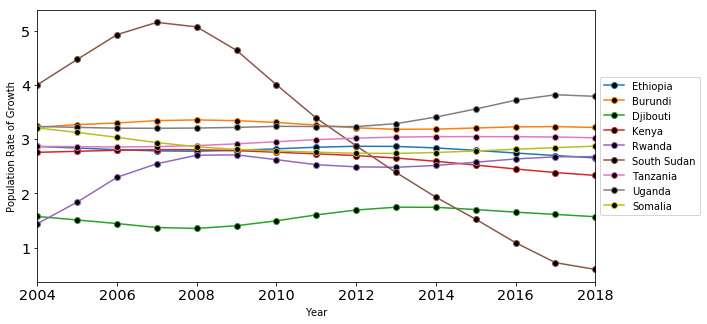

In [288]:
df_population=rate_of_population_growth()
df_population.reset_index(level=0, inplace=True)
y_axis=['Ethiopia','Burundi','Djibouti','Kenya','Rwanda','South Sudan','Tanzania','Uganda','Somalia']
df_population[-15:].plot(x='Year',y=y_axis ,marker='o', fontsize='x-large',markerfacecolor='black',figsize=(10,5), grid=False)
plt.ylabel('Population Rate of Growth')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("population_growth.png", bbox_inches="tight")

In [266]:
#let's get an overall description of the dataframe
df_population.describe()

,Ethiopia,Burundi,Djibouti,Kenya,Rwanda,South Sudan,Tanzania,Uganda,Somalia
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,2.885918,2.701451,1.818569,2.726208,3.103692,3.246979,2.835087,3.257983,3.007112
std,0.157947,0.859201,0.481463,0.166625,2.136665,1.563484,0.221790,0.242904,0.474920
min,2.654638,1.023397,1.288952,2.332741,-1.680620,0.131433,2.344572,2.934058,1.614614
25%,2.795018,2.170296,1.506201,2.687131,2.456664,2.004195,2.740413,3.128740,2.777528
50%,2.859624,3.208730,1.674130,2.762786,2.598972,3.714352,2.874861,3.218443,2.866914
75%,2.922124,3.262191,1.951075,2.804587,2.789952,4.512121,3.021328,3.250287,3.300528
max,3.383248,3.356408,2.965819,3.034388,8.456532,5.156343,3.048071,3.821070,3.868057


In [276]:
rate_of_population_growth().mean().mean()

2.842555481331252

+ As we can see above, the average rate of population growth in East Africa is 2.84 and Ethiopia's rate of population growth is above the average rate of growth in East Africa, which is 2.886 and 5th rank. 
+ The highest rate of population growth in East Africa is 3.257, 3.24, 3.1 of Uganda, South Sudan and Rwanda respectively. The lowest rate of growth in East Africa is Djibouti with rate of population growth 1.81.


# 3. GDP Growth in East Africa

In [263]:
def East_Africa_GDP():
        #let's call the function import_data and pass the countries ID and the population column from each of them
    Ethiopia_pop=import_data('ETH')['GDP']
    Burundi_pop=import_data('BDI')['GDP']
    Djibouti_pop=import_data('DJI')['GDP']
    Kenya_pop=import_data('KEN')['GDP']
    Rwanda_pop=import_data('RWA')['GDP']
    South_Sudan_pop=import_data('SSD')['GDP']
    Tanzania_pop=import_data('TZA')['GDP']
    Uganda_pop=import_data('UGA')['GDP']
    Somalia_pop=import_data('SOM')['GDP']
    
    #create a column name
    col = ['Year','Ethiopia','Burundi', 'Djibouti', 'Kenya', 'Rwanda', 'South Sudan', 'Tanzania', 'Uganda', 'Somalia']

    #let's create a new dataframe to store all the population populated above
    df_GDP = pd.concat([df_Ethio['Year'],Ethiopia_pop, Burundi_pop,Djibouti_pop,
                           Kenya_pop,Rwanda_pop,South_Sudan_pop,
  
                           Tanzania_pop,Uganda_pop,Somalia_pop],axis=1, sort=False)
        #rename the column
    df_GDP.columns=col
    
    df_GDP.sort_values(by=['Year'], inplace=True)
    
    return df_GDP
    
East_Africa_GDP().head()

,Year,Ethiopia,Burundi,Djibouti,Kenya,Rwanda,South Sudan,Tanzania,Uganda,Somalia
24,1994,6.927951e+09,9.250306e+08,4.916892e+08,7.148145e+09,7.536364e+08,NaN,4.510847e+09,3.990430e+09,NaN
23,1995,7.663985e+09,1.000428e+09,4.977240e+08,9.046326e+09,1.293535e+09,NaN,5.255221e+09,5.755819e+09,NaN
22,1996,8.547940e+09,8.690339e+08,4.940046e+08,1.204586e+10,1.382335e+09,NaN,6.496195e+09,6.044585e+09,NaN
21,1997,8.589211e+09,9.728963e+08,5.026755e+08,1.311577e+10,1.851558e+09,NaN,7.683852e+09,6.269333e+09,NaN
20,1998,7.818225e+09,8.937708e+08,5.142679e+08,1.409400e+10,1.989343e+09,NaN,1.227045e+10,6.584816e+09,NaN


In [246]:
East_Africa_GDP().isnull().sum()

Year            0
Ethiopia        0
Burundi         0
Djibouti        0
Kenya           0
Rwanda          0
South Sudan    16
Tanzania        0
Uganda          0
Somalia        19
dtype: int64

There are 16 NAN for south sudan and 19 for Somalia missing values. 

In [264]:
def rate_of_GDP_growth():
    df_gdp =East_Africa_GDP()
    #set the Year as index
    df_gdp =df_gdp.set_index('Year')
    #Percentage change between the current and a prior element
    df_gdp_rate =df_gdp.pct_change(periods=1,fill_method='pad',axis=0)
    
    return df_gdp_rate*100
rate_of_GDP_growth()[-5:]

,Ethiopia,Burundi,Djibouti,Kenya,Rwanda,South Sudan,Tanzania,Uganda,Somalia
Year,,,,,,,,,
2014,16.714200,10.366916,9.836043,11.527579,5.178071,0.184096,9.378735,10.944628,1.253188
2015,15.917937,14.731837,12.281960,4.165638,3.256013,-6.833154,-5.176025,-0.693354,1.627378
2016,15.212600,-4.677548,7.989423,8.094341,2.392819,-75.183669,5.055916,-10.954597,2.564069
2017,10.024123,7.205728,4.557468,13.829756,7.784305,0.000000,7.125414,7.712743,4.210549
2018,3.229631,-2.975216,6.576114,11.619063,4.089000,0.000000,7.720179,5.700757,4.994388


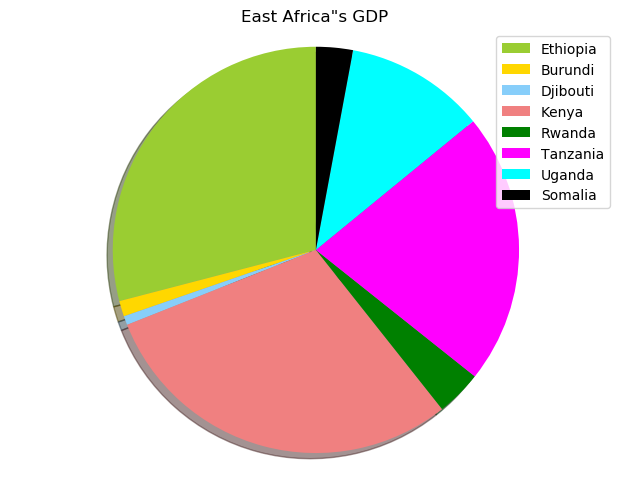

In [361]:
df_m =East_Africa_GDP()
df11=df_m[['Ethiopia','Burundi','Djibouti','Kenya','Rwanda','Tanzania','Uganda','Somalia']]
df11.dropna().mean()
sizes=df11.dropna().mean().tolist()
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','green','magenta','cyan','black']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.title('East Africa"s GDP')
plt.show()

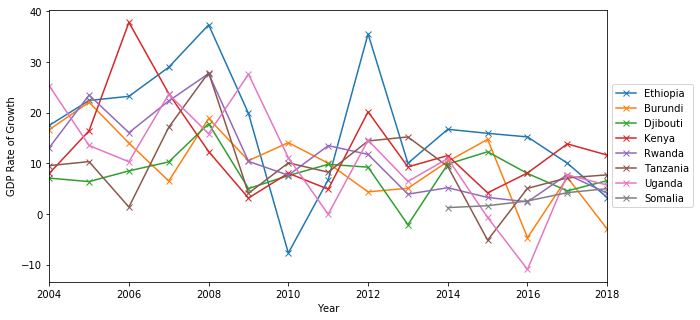

In [285]:
df_East_Africa_GDP=rate_of_GDP_growth()
df_East_Africa_GDP.reset_index(level=0, inplace=True)
y_axis=['Ethiopia','Burundi','Djibouti','Kenya','Rwanda','Tanzania','Uganda','Somalia']
df_East_Africa_GDP[-15:].plot(x='Year',y=y_axis ,marker='x', markerfacecolor='blue',figsize=(10,5), grid=False)
plt.ylabel('GDP Rate of Growth')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("GDP_growth.png", bbox_inches="tight")

In [242]:
rate_of_GDP_growth().info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 1994 to 2018
Data columns (total 9 columns):
Ethiopia       24 non-null float64
Burundi        24 non-null float64
Djibouti       24 non-null float64
Kenya          24 non-null float64
Rwanda         24 non-null float64
South Sudan    10 non-null float64
Tanzania       24 non-null float64
Uganda         24 non-null float64
Somalia        5 non-null float64
dtypes: float64(9)
memory usage: 2.0+ KB


In [260]:
East_Africa_GDP().describe()

,Ethiopia,Burundi,Djibouti,Kenya,Rwanda,South Sudan,Tanzania,Uganda,Somalia
count,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,9.000000e+00,2.500000e+01,2.500000e+01,6.000000e+00
mean,2.841947e+10,1.638180e+09,9.649118e+08,3.345586e+10,4.366011e+09,1.263215e+10,2.590880e+10,1.403467e+10,6.860700e+09
std,2.560792e+10,8.635630e+08,4.807826e+08,2.418930e+10,2.939358e+09,4.222846e+09,1.681830e+10,8.670825e+09,3.822057e+08
min,6.927951e+09,7.846544e+08,4.916892e+08,7.148145e+09,7.536364e+08,3.070885e+09,4.510847e+09,3.990430e+09,6.480990e+09
25%,8.242392e+09,8.937708e+08,5.512309e+08,1.311577e+10,1.851558e+09,1.223136e+10,1.337598e+10,6.193247e+09,6.588907e+09
50%,1.528086e+10,1.273375e+09,7.688737e+08,2.582552e+10,3.116128e+09,1.325763e+10,1.864959e+10,9.942598e+09,6.754500e+09
75%,4.331072e+10,2.333308e+09,1.324734e+09,5.041275e+10,7.334918e+09,1.555014e+10,3.965053e+10,2.311429e+10,7.056000e+09
max,8.435546e+10,3.172416e+09,1.965982e+09,8.790826e+10,9.509003e+09,1.782670e+10,5.743707e+10,2.747695e+10,7.484000e+09


In [279]:
mean_East_Africa_GDP = East_Africa_GDP().mean()
mean_East_Africa_GDP.mean()

7.976798079847989e+96

+ As we can see from the above result, the average GDP growth in East Africa is 7.97 The three highest countries with highest GDP in East Africa: Rwanda 9.5, Kenya 8.79 and Ethiopia 8.43
+ Ethiopian  GDP growth rate is 8.43  which is the third in East Africa and above average mean of the rest countries

# 4. Inflation in East Africa 

In [218]:
def East_Africa_Inflation():
        #let's call the function import_data and pass the countries ID and the population column from each of them
    Ethiopia_pop=import_data('ETH')['Inflation']
    Burundi_pop=import_data('BDI')['Inflation']
    Djibouti_pop=import_data('DJI')['Inflation']
    Kenya_pop=import_data('KEN')['Inflation']
    Rwanda_pop=import_data('RWA')['Inflation']
    South_Sudan_pop=import_data('SSD')['Inflation']
    Tanzania_pop=import_data('TZA')['Inflation']
    Uganda_pop=import_data('UGA')['Inflation']
    Somalia_pop=import_data('SOM')['Inflation']
    
    #create a column name
    col = ['Year','Ethiopia','Burundi', 'Djibouti', 'Kenya', 'Rwanda', 'South Sudan', 'Tanzania', 'Uganda', 'Somalia']

    #let's create a new dataframe to store all the population populated above
    df_Inflation = pd.concat([df_Ethio['Year'],Ethiopia_pop, Burundi_pop,Djibouti_pop,
                           Kenya_pop,Rwanda_pop,South_Sudan_pop,
  
                           Tanzania_pop,Uganda_pop,Somalia_pop],axis=1, sort=False)
    #rename the column
    df_Inflation.columns=col
    
    df_Inflation.sort_values(by=['Year'], inplace=True)
    
    return df_Inflation
#display only for the last 15 years   
East_Africa_Inflation()[-15:]

,Year,Ethiopia,Burundi,Djibouti,Kenya,Rwanda,South Sudan,Tanzania,Uganda,Somalia
14,2004,3.327370,8.176429,3.122262,11.624036,12.250710,NaN,4.735801,3.721287,None
13,2005,9.969971,13.252070,3.104966,10.312778,9.014089,NaN,5.034570,8.448726,None
12,2006,12.299476,2.745420,3.483407,14.453734,8.882827,NaN,7.250973,7.310676,None
11,2007,17.240401,8.412063,4.965977,9.758880,9.080722,NaN,7.025514,6.138511,None
10,2008,44.356686,24.406951,11.958621,26.239817,15.438214,NaN,10.278394,12.050856,None
9,2009,8.483644,10.555436,1.675496,9.234126,12.894833,5.006274,12.142228,13.017256,None
8,2010,8.149264,6.493266,3.950079,3.961389,-0.249888,1.169622,6.200156,3.976553,None
7,2011,33.249960,9.592166,5.068714,14.022494,3.080171,47.305291,12.690969,16.564350,None
6,2012,24.124354,18.161045,3.731210,9.377767,10.271018,45.078257,16.001094,12.679038,None
5,2013,8.079724,7.937958,2.706032,5.717494,5.924269,-0.039381,7.870724,4.905209,None


In [251]:
East_Africa_Inflation().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 24 to 0
Data columns (total 10 columns):
Year           25 non-null object
Ethiopia       24 non-null float64
Burundi        25 non-null float64
Djibouti       18 non-null float64
Kenya          25 non-null float64
Rwanda         23 non-null float64
South Sudan    9 non-null float64
Tanzania       25 non-null float64
Uganda         25 non-null float64
Somalia        0 non-null object
dtypes: float64(8), object(2)
memory usage: 2.1+ KB


The Inflation data for Somalia is missing for all years, Since we are going to drop the column Somali

In [255]:
East_Africa_Inflation().drop(['Somalia'], axis=1).head()

,Year,Ethiopia,Burundi,Djibouti,Kenya,Rwanda,South Sudan,Tanzania,Uganda
24,1994,7.593876,14.852815,NaN,28.814389,NaN,NaN,34.083364,10.036760
23,1995,10.022173,19.263254,NaN,1.554328,NaN,NaN,27.427785,6.550140
22,1996,-8.484249,26.436782,NaN,8.864087,7.411372,NaN,20.977260,7.191647
21,1997,2.395210,31.111590,NaN,11.361845,12.015423,NaN,16.090655,8.169021
20,1998,0.894802,12.500411,NaN,6.722437,6.210067,NaN,12.799754,0.068804


In [256]:
def rate_of_inflation():
    df_Inflation =East_Africa_Inflation().drop(['Somalia'], axis=1)
    #set the Year as index
    df_Inflation =df_Inflation.set_index('Year')
    #Percentage change between the current and a prior element
    df_inflation_rate =df_Inflation.pct_change(periods=1,fill_method='pad',axis=0)
    
    return df_inflation_rate*100
rate_of_inflation()[-15:]

,Ethiopia,Burundi,Djibouti,Kenya,Rwanda,South Sudan,Tanzania,Uganda
Year,,,,,,,,
2004,-75.666524,-23.207733,57.533476,18.423002,64.445683,NaN,-10.705340,-57.130378
2005,199.635141,62.076492,-0.553946,-11.280568,-26.419865,NaN,6.308724,127.037727
2006,23.365214,-79.283085,12.188235,40.153640,-1.456194,NaN,44.023670,-13.470081
2007,40.171828,206.403496,42.560905,-32.481945,2.227844,NaN,-3.109352,-16.033610
2008,157.283379,190.142281,140.811059,168.881429,70.010862,NaN,46.300943,96.315619
2009,-80.874035,-56.752339,-85.989221,-64.808725,-16.474577,NaN,18.133515,8.019353
2010,-3.941467,-38.484150,135.755804,-57.100554,-101.937890,-76.636878,-48.937246,-69.451681
2011,308.011813,47.724830,28.319314,253.979232,-1332.622290,3944.494651,104.687907,316.550467
2012,-27.445464,89.332057,-26.387452,-33.123398,233.456138,-4.707791,26.082518,-23.455867


As we can see from the result above, South Sudan has the major inflation fluctuating from -4303 to 3944. Since, we are going to drop it to plt a balanced graph

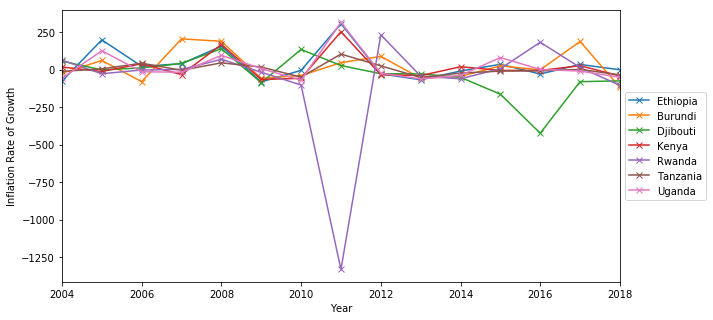

In [259]:
df_East_Africa_inflation=rate_of_inflation().drop(['South Sudan'], axis=1)
df_East_Africa_inflation.reset_index(level=0, inplace=True)
y_axis=['Ethiopia','Burundi','Djibouti','Kenya','Rwanda','Tanzania','Uganda']
df_East_Africa_inflation[-15:].plot(x='Year',y=y_axis ,marker='x', markerfacecolor='blue',figsize=(10,5), grid=False)
plt.ylabel('Inflation Rate of Growth')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("rate_of_inflation.png", bbox_inches="tight")

In [283]:
rate_of_inflation().describe()

,Ethiopia,Burundi,Djibouti,Kenya,Rwanda,South Sudan,Tanzania,Uganda
count,24.000000,24.000000,17.000000,24.000000,22.000000,9.000000,24.000000,24.000000
mean,55.656489,-3.673776,-21.518966,39.807586,-58.018377,346.605102,-4.084821,215.020843
std,524.058249,242.100916,140.035785,143.839067,308.449626,2317.030951,34.114176,1837.232514
min,-1343.526861,-879.645609,-423.158516,-94.605722,-1332.622290,-4303.067224,-50.811340,-3119.206792
25%,-76.968402,-60.353247,-73.953935,-40.979714,-57.271610,-76.636878,-23.350633,-51.622029
50%,-6.163514,-11.486631,-26.387452,-7.805350,-15.375005,-4.707791,-9.784168,-19.744739
75%,37.486386,51.312746,42.560905,31.172207,50.442281,619.209548,4.059455,10.742941
max,1925.517100,621.682786,210.838545,470.284168,273.871055,3944.494651,104.687907,8296.829464


In [284]:
mean_inflation =rate_of_inflation().mean()
mean_inflation.mean()

71.22426002212742

+ The average of inflation rate of East Africa is 71.22 and an average Ethiopian inflation rate for the last 25 years is 55.65 

# 5. Import the data to MYSQL

In [11]:
#establish the database connection, create a database and handle exceptions/errors
#create try - catch to catch all errors using the errors.Error exception
def create_database_and_connect_to_mysql():
    
    try:
        con = mysql.connector.connect(host='127.0.0.1', user='root', passwd='142121')
        
        db_cursor = con.cursor(buffered=True)

        #create a database
        db_cursor.execute('CREATE DATABASE IF NOT EXISTS World_bank_data')
    except mysql.connector.Error as err:
        if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
            print("Error with user name or password")
        elif err.errno == errorcode.ER_BAD_DB_ERROR:
            print("Database does not exist or database name Error")
        else:
            print(err)
    
    return db_cursor, con


create_database_and_connect_to_mysql()

(<mysql.connector.cursor_cext.CMySQLCursorBuffered at 0x27230a9a550>,
 <mysql.connector.connection_cext.CMySQLConnection at 0x27230a91ef0>)

In [12]:
#check if the database was created
def check_databases():
    cur, conn = create_database_and_connect_to_mysql()
   
    #show all databses 
    cur.execute("SHOW DATABASES")
    for x in cur:
        print(x)
                        
check_databases()

('dawit_module_2',)
('information_schema',)
('my_first_db',)
('mysql',)
('performance_schema',)
('sakila',)
('sys',)
('world',)
('world_bank_data',)


### 5.1 Create a Tables to store data in MYSQL

In [22]:
#create a table to store the data-Ethiopian data
def create_tables():
    
    mycursor, conn = create_database_and_connect_to_mysql()
    conn.connect(database="world_bank_data")
    
    #create table to import the Ethiopian data from world bank dataFrame 
    mycursor.execute('CREATE Table IF NOT EXISTS Ethiopiadata \
    (Year VARCHAR(255), Population BIGINT ,GDP BIGINT,  Inflation int)')
    
    #create table to import the Burundi data from world bank dataFrame 
    mycursor.execute('CREATE Table IF NOT EXISTS Burundidata \
    (Year VARCHAR(255), Population BIGINT ,GDP BIGINT,  Inflation int)')
    
    #create table to import the Djibouti data from world bank dataFrame 
    mycursor.execute('CREATE Table IF NOT EXISTS Djiboutidata \
    (Year VARCHAR(255), Population BIGINT ,GDP BIGINT,  Inflation int)')
    
    #create table to import the Kenya data from world bank dataFrame 
    mycursor.execute('CREATE Table IF NOT EXISTS Kenyadata \
                     (Year VARCHAR(255), Population BIGINT ,GDP BIGINT,  Inflation int)')
    
    #create table to import the Rwanda data from world bank dataFrame 
    mycursor.execute('CREATE Table IF NOT EXISTS Rwandadata \
                     (Year VARCHAR(255), Population BIGINT ,GDP BIGINT,  Inflation int)')
    
    #create table to import the South Sudan data from world bank dataFrame 
    mycursor.execute('CREATE Table IF NOT EXISTS SouthSudandata \
    (Year VARCHAR(255), Population BIGINT ,GDP BIGINT,  Inflation int)')
    
    #create table to import the Tanzania data from world bank dataFrame 
    mycursor.execute('CREATE Table IF NOT EXISTS Tanzaniadata \
    (Year VARCHAR(255), Population BIGINT ,GDP BIGINT,  Inflation int)')
    
    #create table to import the Uganda data from world bank dataFrame 
    mycursor.execute('CREATE Table IF NOT EXISTS Ugandadata \
    (Year VARCHAR(255), Population BIGINT ,GDP BIGINT,  Inflation int)')
    
    #create table to import the Somalia data from world bank dataFrame 
    mycursor.execute('CREATE Table IF NOT EXISTS Somaliadata \
    (Year VARCHAR(255), Population BIGINT ,GDP BIGINT,  Inflation int)')
    

    print('Tables Created')
    
create_tables()   

Tables Created


### 5.2 Load the Data to MYSQL: Using Pandas DataFrame

In [30]:
#Load the dataframe to my local server of MySQL
def load_the_data_to_MYSQL():
  
    #make connections usind the function create_database_and_connect_to_mysql
    curs, con =create_database_and_connect_to_mysql()
    
    #create engine to upload the dataframe file into MYSQL
    engine = create_engine('mysql+pymysql://' + 'root' + ':' + '142121' + '@' + '127.0.0.1' + ':' \
                           + str(3306) + '/' + 'world_bank_data' , echo=False)
    
    #load Ethiopian data from the dataFrame
    import_data('ETH').to_sql(name='ethiopiadata', con=engine, if_exists = 'replace', index=False)
    
     #load Burundi data from the dataFrame
    import_data('BDI').to_sql(name='burundidata', con=engine, if_exists = 'replace', index=False)
    
     #load Ethiopian data from the dataFrame
    import_data('DJI').to_sql(name='djiboutidata', con=engine, if_exists = 'replace', index=False)
    
     #load Ethiopian data from the dataFrame
    import_data('KEN').to_sql(name='kenyadata', con=engine, if_exists = 'replace', index=False)
    
     #load Ethiopian data from the dataFrame
    import_data('RWA').to_sql(name='rwandadata', con=engine, if_exists = 'replace', index=False)
    
     #load Ethiopian data from the dataFrame
    import_data('SSD').to_sql(name='southsudandata', con=engine, if_exists = 'replace', index=False)
    
     #load Ethiopian data from the dataFrame
    import_data('TZA').to_sql(name='tanzaniadata', con=engine, if_exists = 'replace', index=False)
    
     #load Ethiopian data from the dataFrame
    import_data('UGA').to_sql(name='ugandadata', con=engine, if_exists = 'replace', index=False)
    
     #load Ethiopian data from the dataFrame
    import_data('SOM').to_sql(name='somaliadata', con=engine, if_exists = 'replace', index=False)
      
    
    con.close()
    print('loaded')
            
load_the_data_to_MYSQL()

loaded


### 5.3 Read the Data  from MYSQL database


In [32]:
#create a function that can pass a MYSQL statment and return a dataframe
def read_data_from_MYSQL(sql_statment):
    #make connection to database
    cur, conn = create_database_and_connect_to_mysql()
    #select database
    conn.connect(database="world_bank_data")
    #select all rows from the payment database
    
    df =pd.read_sql(sql_statment, con=conn)
    return df

### 5.4 Load the Data to Local Excel file

In [227]:
#let's save the file to local
def save_to_local():
    #save the population groowth to local
    df_population =East_Africa_population()
    rate_pop =rate_of_population_growth()
    east_Africa_Inflation=East_Africa_Inflation()
    df_rate_of_inflation=rate_of_inflation()
    east_Africa_GDP=East_Africa_GDP()
    df_rate_of_GDP_growth=rate_of_GDP_growth()
    
    #let's svaen all the file to spreadsheet
    with pd.ExcelWriter('Economic_Growth.xlsx') as writer:
        df_population.to_excel(writer, sheet_name='East Africa Population')
        rate_pop.to_excel(writer, sheet_name='Rate of Population Growth')
        east_Africa_Inflation.to_excel(writer, sheet_name='East Africa Inflation')
        df_rate_of_inflation.to_excel(writer, sheet_name='rate of inflation')
        east_Africa_GDP.to_excel(writer, sheet_name='East Africa GDP')
        df_rate_of_GDP_growth.to_excel(writer, sheet_name='Rate of GDP')
    
    
save_to_local()
print('Saved')

Saved


# 6. Conclusion

+ The average rate of population growth in East Africa is 2.84 and Ethiopia's rate of population growth is above the average rate of growth in East Africa, which is 2.886 and it is ranked 5th. 
+ The highest rate of population growth in East Africa is 3.257, 3.24, 3.1 of Uganda, South Sudan and Rwanda respectively. The lowest rate of growth in East Africa is Djibouti with the rate of population growth 1.81.
+ As we can see from the above result, the average GDP growth in East Africa is 7.97.
+ The three highest countries with the highest GDP in East Africa are: Rwanda 9.5, Kenya 8.79 and Ethiopia 8.43
+ The Ethiopian  GDP growth rate is 8.43  which is the third in East Africa and above average mean of the rest countries
+ The average of the inflation rate of East Africa is 71.22 and an average Ethiopian inflation rate for the last 25 years is 55.65 

## References

1. East Africa Economic Outlook 2019:https://www.afdb.org/fileadmin/uploads/afdb/Documents/Publications/2019AEO/REO_2019_-_East_Africa_.pdf
2. https://datacatalog.worldbank.org/dataset/world-development-indicators
3. The documentations for world bank: https://wbdata.readthedocs.io/en/latest/
4. wbdata API documentation: https://wbdata.readthedocs.io/en/latest/